# Оценка потенциала территории

## Код

In [3]:
from enum import Enum

class Profile(Enum):
  RESIDENTIAL_INDIVIDUAL = 'Жилая застройка - ИЖС'
  RESIDENTIAL_LOWRISE = 'Жилая застройка - Малоэтажная'
  RESIDENTIAL_MIDRISE = 'Жилая застройка - Среднеэтажная'
  RESIDENTIAL_MULTISTOREY = 'Жилая застройка - Многоэтажная'
  BUSINESS = 'Общественно-деловая'
  RECREATION = 'Рекреационная'
  SPECIAL = 'Специального назначения'
  INDUSTRIAL = 'Промышленная'
  AGRICULTURE = 'Сельско-хозяйственная'
  TRANSPORT = 'Транспортная инженерная'

Это если просто считать

In [4]:
PROFILES = {
  Profile.RESIDENTIAL_INDIVIDUAL: {
      "criteria": {"population": 1, "transport": 2, "ecology": 4, "social": 4, "engineering": 3},
      "weights": {"population": 0, "transport": 0, "ecology": 1, "social": 1, "engineering": 0}
  },
  Profile.RESIDENTIAL_LOWRISE: {
      "criteria": {"population": 3, "transport": 3, "ecology": 4, "social": 3, "engineering": 4},
      "weights": {"population": 1, "transport": 1, "ecology": 1, "social": 1, "engineering": 1}
  },
  Profile.RESIDENTIAL_MIDRISE: {
      "criteria": {"population": 4, "transport": 4, "ecology": 4, "social": 3, "engineering": 5},
      "weights": {"population": 1, "transport": 1, "ecology": 1, "social": 1, "engineering": 1}
  },
  Profile.RESIDENTIAL_MULTISTOREY: {
      "criteria": {"population": 5, "transport": 5, "ecology": 4, "social": 3, "engineering": 5},
      "weights": {"population": 1, "transport": 1, "ecology": 1, "social": 1, "engineering": 1}
  },
  Profile.BUSINESS: {
      "criteria": {"population": 4, "transport": 5, "ecology": 4, "social": 2, "engineering": 4},
      "weights": {"population": 1, "transport": 1, "ecology": 1, "social": 0, "engineering": 1}
  },
  Profile.RECREATION: {
      "criteria": {"population": 0, "transport": 0, "ecology": 4, "social": 0, "engineering": 0},
      "weights": {"population": 0, "transport": 0, "ecology": 0, "social": 0, "engineering": 0}
  },
  Profile.SPECIAL: {
      "criteria": {"population": 0, "transport": 3, "ecology": 1, "social": 0, "engineering": 2},
      "weights": {"population": 1, "transport": 1, "ecology": 1, "social": 0, "engineering": 1}
  },
  Profile.INDUSTRIAL: {
      "criteria": {"population": 3, "transport": 4, "ecology": 0, "social": 2, "engineering": 4},
      "weights": {"population": 1, "transport": 1, "ecology": 0, "social": 0, "engineering": 1}
  },
  Profile.AGRICULTURE: {
      "criteria": {"population": 3, "transport": 4, "ecology": 4, "social": 2, "engineering": 3},
      "weights": {"population": 1, "transport": 1, "ecology": 1, "social": 0, "engineering": 1}
  },
  Profile.TRANSPORT: {
      "criteria": {"population": 2, "transport": 2, "ecology": 0, "social": 1, "engineering": 2},
      "weights": {"population": 0, "transport": 0, "ecology": 0, "social": 0, "engineering": 0}
  }
}

А это если дать веса

In [6]:
PROFILES = {
    Profile.RESIDENTIAL_INDIVIDUAL: {
        "population": 0.3, "transport": 0.2, "ecology": 0.25, "social": 0.15, "engineering": 0.1
    },
    Profile.RESIDENTIAL_LOWRISE: {
        "population": 0.3, "transport": 0.2, "ecology": 0.25, "social": 0.15, "engineering": 0.1
    },
    Profile.RESIDENTIAL_MIDRISE: {
        "population": 0.25, "transport": 0.25, "ecology": 0.2, "social": 0.2, "engineering": 0.1
    },
    Profile.RESIDENTIAL_MULTISTOREY: {
        "population": 0.2, "transport": 0.3, "ecology": 0.2, "social": 0.2, "engineering": 0.1
    },
    Profile.BUSINESS: {
        "population": 0.1, "transport": 0.35, "ecology": 0.1, "social": 0.2, "engineering": 0.25
    },
    Profile.RECREATION: {
        "population": 0.15, "transport": 0.15, "ecology": 0.4, "social": 0.1, "engineering": 0.2
    },
    Profile.SPECIAL: {
        "population": 0.1, "transport": 0.3, "ecology": 0.1, "social": 0.15, "engineering": 0.35
    },
    Profile.INDUSTRIAL: {
        "population": 0.05, "transport": 0.4, "ecology": 0.1, "social": 0.1, "engineering": 0.35
    },
    Profile.AGRICULTURE: {
        "population": 0.2, "transport": 0.15, "ecology": 0.3, "social": 0.15, "engineering": 0.2
    },
    Profile.TRANSPORT: {
        "population": 0.05, "transport": 0.45, "ecology": 0.05, "social": 0.1, "engineering": 0.35
    }
}

In [34]:
def _is_criterion_satisfied(profile_value, criterion_value):
    if isinstance(profile_value, tuple):
        return profile_value[0] <= criterion_value <= profile_value[1]
    return criterion_value >= profile_value

def _calculate_exceedance(profile_value, criterion_value):
    if isinstance(profile_value, tuple):
        if profile_value[0] <= criterion_value <= profile_value[1]:
            return criterion_value - profile_value[0]
        return 0
    return max(0, criterion_value - profile_value)

def calculate_potential(population, transport, ecology, social, engineering):
    
    criteria_values = {
        "population": population, 
        "transport": transport, 
        "ecology": ecology, 
        "social": social, 
        "engineering": engineering
    }

    ...

    potential_scores = {}
    for profile, weights in PROFILES.items():
        score = sum([weight * criteria_values[name] for name, weight in weights.items()])
        potential_scores[profile.name] = {'potential' : score }

    return potential_scores

    ...

    potential_scores = {}
    for profile, data in PROFILES.items():
        criteria = data["criteria"]
        weights = data["weights"]
        potential = sum(
            _is_criterion_satisfied(criteria[criterion], value)
            for criterion, value in criteria_values.items()
        )
        weighted_score = sum(
            _calculate_exceedance(criteria.get(criterion, -1), value) * weights[criterion]
            for criterion, value in criteria_values.items()
        )
        potential_scores[profile.name] = {
            'potential': potential,
            'weighted_score': weighted_score
        }

    return potential_scores

## Оценка

In [35]:
import geopandas as gpd

### Население

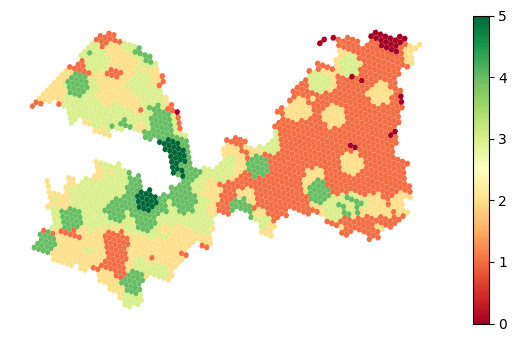

In [36]:
population = gpd.read_file('potential/population.geojson').to_crs(4326).rename(columns={'score': 'population'})[['geometry', 'population']]
population.plot(column='population', cmap='RdYlGn', vmin=0, vmax=5, legend=True, figsize=(8,4)).set_axis_off()

### Транспорт

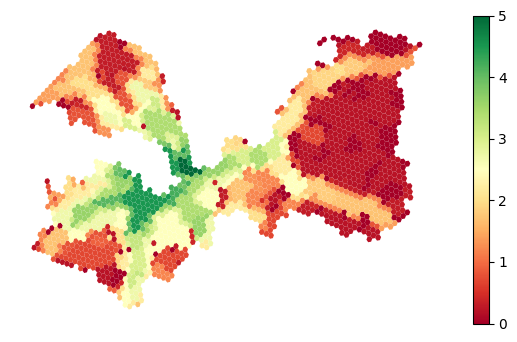

In [37]:
transport = gpd.read_parquet('potential/transport.parquet')
transport = transport[['geometry', 'overall_assessment']].rename(columns={'overall_assessment':'transport'}).to_crs(4326)
transport['transport'] = transport['transport'].apply(lambda t : round(t,1))
transport.plot(column='transport', cmap='RdYlGn', vmin=0, vmax=5, legend=True, figsize=(8,4)).set_axis_off()

### Экология

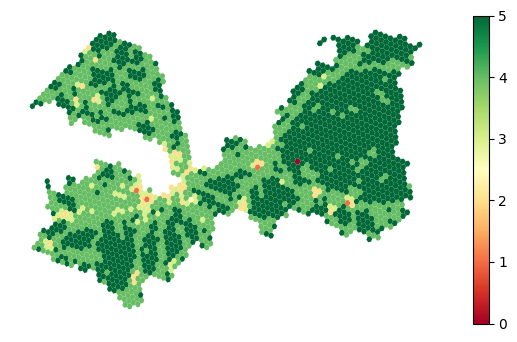

In [38]:
ecology = gpd.read_file('potential/ecology.geojson').to_crs(4326).rename(columns={'relative mark':'ecology'})[['geometry', 'ecology']]
ecology.plot(column='ecology', cmap='RdYlGn', vmin=0, vmax=5, legend=True, figsize=(8,4)).set_axis_off()

### Социальная обеспеченность

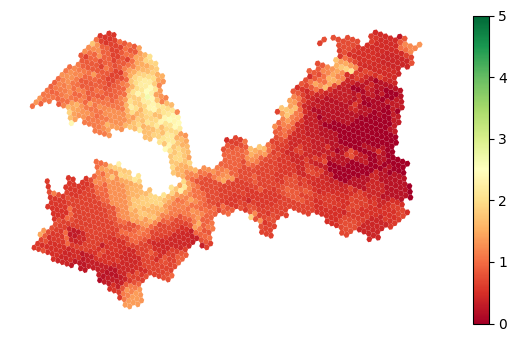

In [39]:
social = gpd.read_file('potential/social.geojson').to_crs(4326)[['geometry', 'social']]
social.plot(column='social', cmap='RdYlGn', vmin=0, vmax=5, legend=True, figsize=(8,4)).set_axis_off()

### Инженерная инфраструктура

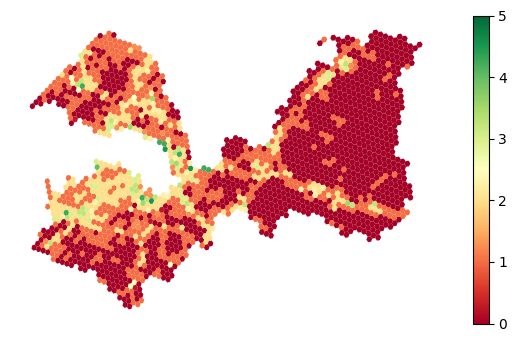

In [40]:
engineering = gpd.read_file('potential/engineering.geojson').to_crs(4326).rename(columns={'Average_Rating':'engineering'})[['geometry', 'engineering']]
engineering.plot(column='engineering', cmap='RdYlGn', vmin=0, vmax=5, legend=True, figsize=(8,4)).set_axis_off()

### Сама оценка

In [41]:
gdf = population.copy()
gdf['transport'] = transport['transport']
gdf['ecology'] = ecology['ecology']
gdf['social'] = social['social']
gdf['engineering'] = engineering['engineering']

In [42]:
import pandas as pd

gdf['potential'] = gdf.apply(lambda s : {profile:res['potential'] for profile, res in calculate_potential(
  s.population, 
  s.transport, 
  s.ecology,
  s.social,
  s.engineering
).items()}, axis=1)
potential_gdf = pd.merge(gdf, gdf.potential.apply(pd.Series).rename(columns=lambda c : f'Потенциал: {Profile[c].value}'), left_index=True, right_index=True).drop(columns=['potential'])

In [43]:
potential_gdf = potential_gdf.rename(columns={
  'population': 'Показатель: Население',
  'transport': 'Показатель: Транспорт',
  'ecology': 'Показатель: Экология',
  'social': 'Показатель: Социальная обеспеченность',
  'engineering': 'Показатель: Инженерная инфраструктура'
})

In [44]:
potential_gdf.to_file('potential/potential.geojson')

In [45]:
potential_gdf.head()

,geometry,Показатель: Население,Показатель: Транспорт,Показатель: Экология,Показатель: Социальная обеспеченность,Показатель: Инженерная инфраструктура,Потенциал: Жилая застройка - ИЖС,Потенциал: Жилая застройка - Малоэтажная,Потенциал: Жилая застройка - Среднеэтажная,Потенциал: Жилая застройка - Многоэтажная,Потенциал: Общественно-деловая,Потенциал: Рекреационная,Потенциал: Специального назначения,Потенциал: Промышленная,Потенциал: Сельско-хозяйственная,Потенциал: Транспортная инженерная
0,"POLYGON ((29.65352 60.75606, 29.69198 60.73276...",2.0,0.8,4.0,0.95,0.0,1.9025,1.9025,1.690,1.63,1.070,2.115,0.9825,0.915,1.8625,0.755
1,"POLYGON ((34.21298 59.70612, 34.24864 59.68080...",1.0,0.2,5.0,0.20,0.0,1.6200,1.6200,1.340,1.30,0.710,2.200,0.6900,0.650,1.7600,0.410
2,"POLYGON ((30.54114 59.98839, 30.57846 59.96455...",5.0,4.5,3.0,1.75,2.0,3.6125,3.6125,3.525,3.50,3.225,3.200,3.1125,3.225,3.2375,3.300
3,"POLYGON ((34.68571 60.95192, 34.72244 60.92676...",1.0,1.4,5.0,0.45,0.0,1.8975,1.8975,1.690,1.71,1.180,2.405,1.0875,1.155,1.9775,0.975
4,"POLYGON ((34.50920 59.59026, 34.54462 59.56480...",2.0,1.2,5.0,0.40,1.0,2.2500,2.2500,1.980,1.94,1.450,2.720,1.4700,1.470,2.3400,1.280


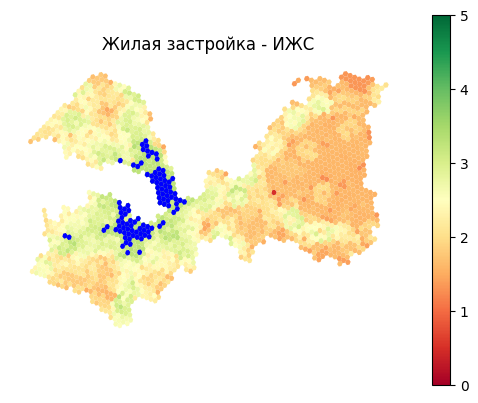

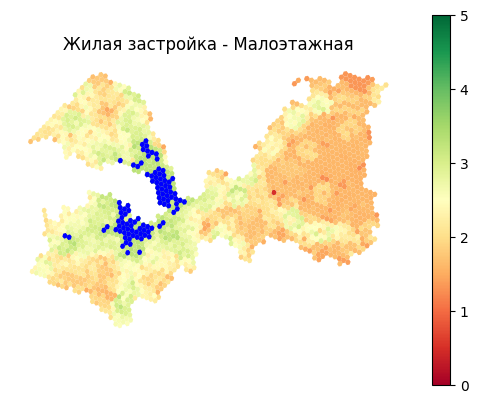

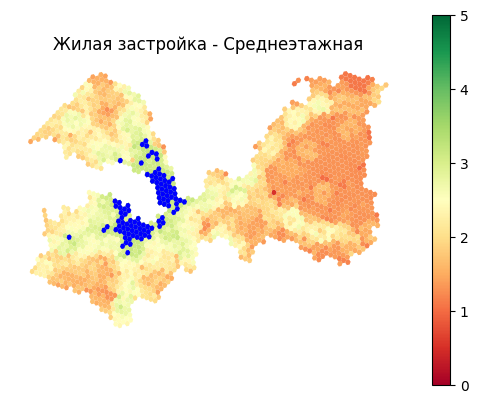

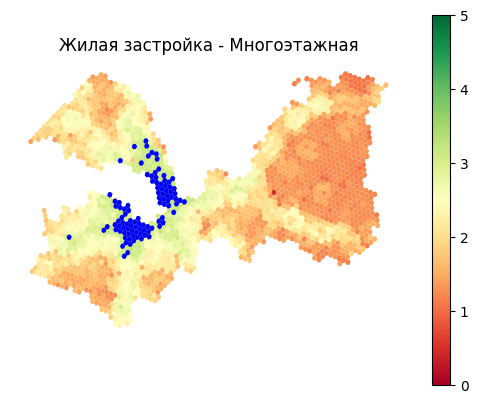

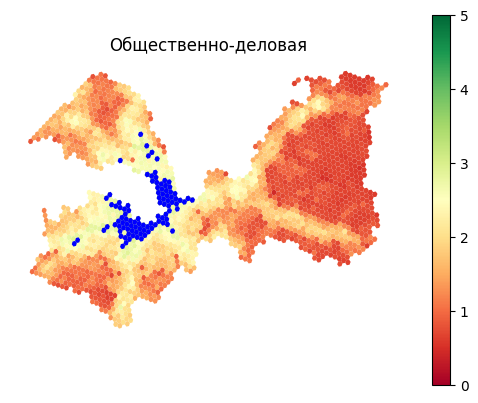

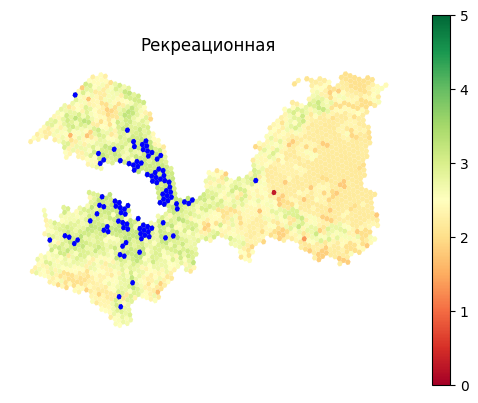

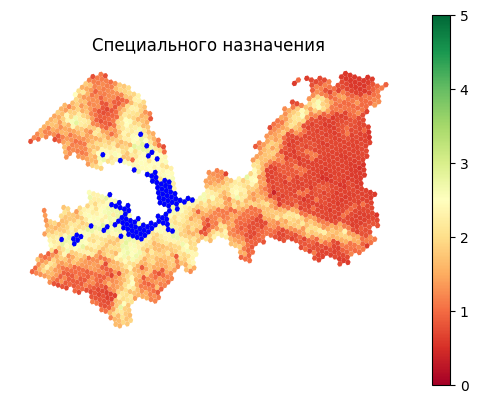

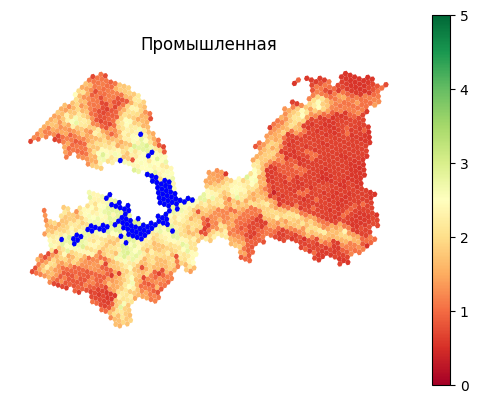

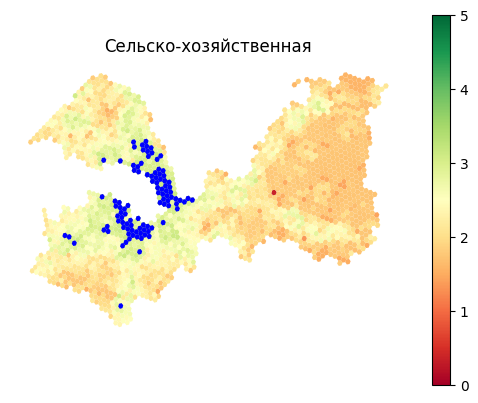

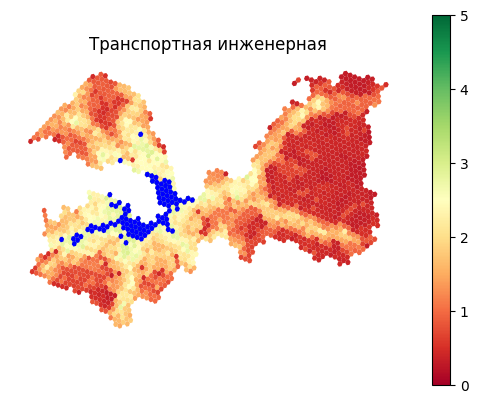

In [57]:
for profile in list(Profile):
  ax = potential_gdf.plot(column=f'Потенциал: {profile.value}', cmap='RdYlGn', vmax=5, vmin=0, legend=True)
  gdf = potential_gdf.sort_values(f'Потенциал: {profile.value}', ascending=False)
  gdf = gdf.head(100)
  gdf.plot(ax=ax, color='blue')
  ax.set_axis_off()
  ax.set_title(profile.value)

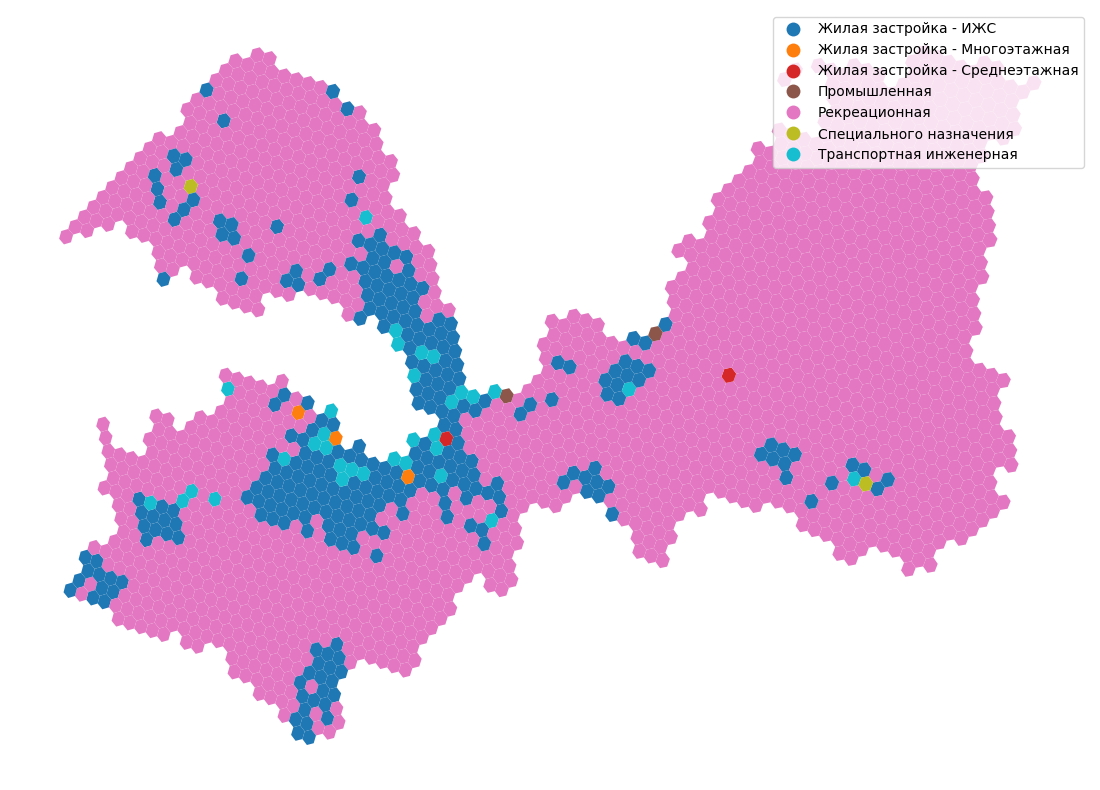

In [59]:
def select_profile(series):
  max_value = 0
  max_profile = None
  for profile in list(Profile):
    column = f'Потенциал: {profile.value}'
    value = series[column]
    if value > max_value:
      max_value = value
      max_profile = profile.value
  return max_profile

potential_gdf['Рекомендуемый профиль'] = potential_gdf.apply(select_profile, axis=1)
ax = potential_gdf.plot(column='Рекомендуемый профиль', legend=True, figsize=(15,10))
ax.set_axis_off()